In [157]:
pd.set_option('display.max_columns', None)  

In [57]:
import pandas as pd
import numpy as np

import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

from pprint import pprint

First I am going to run Logistic Regression on a few different feature selections.

Just as a reminder, here is the key for my dataframes:

 - df_games_X_1 = All (dummy drop 1, on_pace instead of current_by_remaining_rate to avoid non-linear model) Logistic
 - df_games_X_2 = All (one hot no drop, current_by_remaining_rate, to use in RF) RF
 - df_games_X_3 = Non-text features (dummy drop 1, on_pace instead of current_by_remaining_rate to avoid non-linear model) Logistic
 - df_games_X_4 = Non-text features (one hot no drop, current_by_remaining_rate, to use in RF) RF
 - df_games_X_5 = Only text features Logistic

In [58]:
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_1.pickle', 'rb') as f:
    df_games_X_1 = pickle.load(f)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_2.pickle', 'rb') as f:
    df_games_X_2 = pickle.load(f)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_3.pickle', 'rb') as f:
    df_games_X_3 = pickle.load(f)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_4.pickle', 'rb') as f:
    df_games_X_4 = pickle.load(f)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_5.pickle', 'rb') as f:
    df_games_X_5 = pickle.load(f)

In [175]:
df_testing = pd.DataFrame(df_games_X_4.iloc[1])

In [176]:
df_testing

,1
is_successful,1.000000
current_by_remaining_rate,2.523812
staff_pick_num,0.000000
time_to_launch,12.000000
day_limit,30.000000
money_needed_by_day,200.764706
blurb_char_count,97.000000
name_char_count,51.000000
category_name_x_Games,0.000000
category_name_x_Gaming Hardware,0.000000


For Logistic, I am going to use X_1, X_3, and X_5.

I don't expect X_5 to be nearly as good, but it could be interesting to see how much the LSA text information is predictive. I can also use this later (or now) to tune how many components by cross validating with different numbers. That should be pretty simple once I have the "pipeline"

Also, just as a note to myself, my "y" values will always be the same, so I should only have one y_test and y_train. Using the same random state in the same function call should do this. I'll write some code just to double check that the values are the same:

In [59]:
X_1 = df_games_X_1.iloc[:, 1:]
y_1 = df_games_X_1.iloc[:, 0]

X_2 = df_games_X_2.iloc[:, 1:]
y_2 = df_games_X_2.iloc[:, 0]

X_3 = df_games_X_3.iloc[:, 1:]
y_3 = df_games_X_3.iloc[:, 0]

X_4 = df_games_X_4.iloc[:, 1:]
y_4 = df_games_X_4.iloc[:, 0]

X_5 = df_games_X_5.iloc[:, 1:]
y_5 = df_games_X_5.iloc[:, 0]

In [60]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

X4_train, X4_test, y4_train, y4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

X5_train, X5_test, y5_train, y5_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42)


In [61]:
# Just checking that all of the y splits are the same
print(np.all(y1_train == y2_train))
print(np.all(y1_test == y2_test))
print(np.all(y2_train == y3_train))
print(np.all(y2_test == y3_test))
print(np.all(y3_train == y4_train))
print(np.all(y3_test == y4_test))
print(np.all(y4_train == y5_train))
print(np.all(y4_test == y5_test))

True
True
True
True
True
True
True
True


Success - so now moving on to cross-validation

In [70]:
# for df_games_X_1
logreg1 = LogisticRegression()

# for df_games_X_3
logreg3 = LogisticRegression()

# for df_games_X_5
logreg5 = LogisticRegression()

In [63]:
print('Parameters currently in use:\n')
pprint(logreg.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [64]:
# for df_games_X_1
scaler1 = StandardScaler()

# for df_games_X_3
scaler3 = StandardScaler()

# for df_games_X_5
scaler5 = StandardScaler()

In [68]:
scaler1.fit(X1_train.values)
X1_tr = scaler1.transform(X1_train.values)
X1_te = scaler1.transform(X1_test.values)

scaler3.fit(X3_train.values)
X3_tr = scaler3.transform(X3_train.values)
X3_te = scaler3.transform(X3_test.values)

scaler5.fit(X5_train.values)
X5_tr = scaler5.transform(X5_train.values)
X5_te = scaler5.transform(X5_test.values)

In [69]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# pick a solver
solver = ['lbfgs', 'liblinear']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [72]:
### # for df_games_X_1
# Create grid search using 3-fold cross validation
logreg_clf1 = GridSearchCV(logreg, hyperparameters, cv=3, verbose=0)

# Fit grid search with scaled x values and y tain
best_logreg_model1 = logreg_clf1.fit(X1_tr, y1_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

In [73]:
### # for df_games_X_3
# Create grid search using 3-fold cross validation
logreg_clf3 = GridSearchCV(logreg, hyperparameters, cv=3, verbose=0)

# Fit grid search with scaled x values and y tain
best_logreg_model3 = logreg_clf3.fit(X3_tr, y3_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

In [74]:
### # for df_games_X_5
# Create grid search using 3-fold cross validation
logreg_clf5 = GridSearchCV(logreg, hyperparameters, cv=3, verbose=0)

# Fit grid search with scaled x values and y tain
best_logreg_model5 = logreg_clf5.fit(X5_tr, y5_train)

In [75]:
best_logreg_model1.best_score_

0.9171785638635882

In [79]:
print('Best C:', best_logreg_model1.best_estimator_.get_params()['C'])

Best C: 1.0


In [76]:
best_logreg_model3.best_score_

0.9165431052743063

In [80]:
print('Best C:', best_logreg_model3.best_estimator_.get_params()['C'])

Best C: 1.0


In [77]:
best_logreg_model5.best_score_

0.6752806608769328

In [81]:
print('Best C:', best_logreg_model5.best_estimator_.get_params()['C'])

Best C: 2.7825594022071245


My first results are based on All features - numeric, categorical, and text

In [82]:
f1_best_logreg_model1 = f1_score(best_logreg_model1.predict(X1_te), y1_test)
accuracy_best_logreg_model1 = accuracy_score(best_logreg_model1.predict(X1_te), y1_test)
precision_best_logreg_model1 = precision_score(best_logreg_model1.predict(X1_te), y1_test)
recall_best_logreg_model1 = recall_score(best_logreg_model1.predict(X1_te), y1_test)
AUC_best_logreg_model1 = roc_auc_score(best_logreg_model1.predict(X1_te), y1_test)

print(f'F1 test score is {f1_best_logreg_model1}')
print(f'Accuracy test score is {accuracy_best_logreg_model1}')
print(f'precision test score is {precision_best_logreg_model1}')
print(f'recall test score is {recall_best_logreg_model1}')
print(f'AUC test score is {AUC_best_logreg_model1}')

F1 test score is 0.9049429657794678
Accuracy test score is 0.9153259949195597
precision test score is 0.8717948717948718
recall test score is 0.9407114624505929
AUC test score is 0.9185038793734446


The below is just on numeric and categorical, slightly better than with text, but not by much

In [84]:
f1_best_logreg_model3 = f1_score(best_logreg_model3.predict(X3_te), y1_test)
accuracy_best_logreg_model3 = accuracy_score(best_logreg_model3.predict(X3_te), y1_test)
precision_best_logreg_model3 = precision_score(best_logreg_model3.predict(X3_te), y1_test)
recall_best_logreg_model3 = recall_score(best_logreg_model3.predict(X3_te), y1_test)
AUC_best_logreg_model3 = roc_auc_score(best_logreg_model3.predict(X3_te), y1_test)

print(f'F1 test score is {f1_best_logreg_model3}')
print(f'Accuracy test score is {accuracy_best_logreg_model3}')
print(f'precision test score is {precision_best_logreg_model3}')
print(f'recall test score is {recall_best_logreg_model3}')
print(f'AUC test score is {AUC_best_logreg_model3}')

F1 test score is 0.9116809116809116
Accuracy test score is 0.9212531752751905
precision test score is 0.8791208791208791
recall test score is 0.9467455621301775
AUC test score is 0.9244113567327445


Most surprising, my DF with *only* text features still seems somewhat decent. Predicting correctly 68% of the time!

The fact that precision is low makes me think it's favoring predicting in the positive, even though the data is slightly skewed towards negative.

This really makes me want to do some k-means clustering - what I should do is go through my rf models, see how those work, and then come back to this. First step - try different numbers of topics (10,20,30,40,50, maybe more, it's cheap to run). When I pick my number of topics, then do kmeans and figure out my clusters.

Once I am done with that, really all I need to do is build the recommender and slides, because I think my model is good enough at this point to move on. Just need to make sure I do something with my text

In [86]:
f1_best_logreg_model5 = f1_score(best_logreg_model5.predict(X5_te), y1_test)
accuracy_best_logreg_model5 = accuracy_score(best_logreg_model5.predict(X5_te), y1_test)
precision_best_logreg_model5 = precision_score(best_logreg_model5.predict(X5_te), y1_test)
recall_best_logreg_model5 = recall_score(best_logreg_model5.predict(X5_te), y1_test)
AUC_best_logreg_model5 = roc_auc_score(best_logreg_model5.predict(X5_te), y1_test)

print(f'F1 test score is {f1_best_logreg_model5}')
print(f'Accuracy test score is {accuracy_best_logreg_model5}')
print(f'precision test score is {precision_best_logreg_model5}')
print(f'recall test score is {recall_best_logreg_model5}')
print(f'AUC test score is {AUC_best_logreg_model5}')

F1 test score is 0.6047471620227038
Accuracy test score is 0.6756985605419137
precision test score is 0.5366300366300366
recall test score is 0.6926713947990544
AUC test score is 0.6794491538639071


Random Forest setup and modeling:

In [87]:
rf_clf = RandomForestClassifier(random_state=42)

In [88]:
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [89]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [90]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random2.fit(X2_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [118]:
rf_random2.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [117]:
f1_best_rf_2 = f1_score(rf_random2.predict(X2_test), y2_test)
accuracy_best_rf_2 = accuracy_score(rf_random2.predict(X2_test), y2_test)
precision_best_rf_2 = precision_score(rf_random2.predict(X2_test), y2_test)
recall_best_rf_2 = recall_score(rf_random2.predict(X2_test), y2_test)
AUC_best_rf_2 = roc_auc_score(rf_random2.predict(X2_test), y2_test)

print(f'F1 test score is {f1_best_rf_2}')
print(f'Accuracy test score is {accuracy_best_rf_2}')
print(f'precision test score is {precision_best_rf_2}')
print(f'recall test score is {recall_best_rf_2}')
print(f'AUC test score is {AUC_best_rf_2}')

F1 test score is 0.9322191272051995
Accuracy test score is 0.9381879762912786
precision test score is 0.9194139194139194
recall test score is 0.9453860640301318
AUC test score is 0.9388468781689121


In [119]:
feature_list2 = list(X_2.columns)

In [120]:
importances2 = list(rf_random2.best_estimator_.feature_importances_)

In [121]:
feature_importances_2 = list(zip(feature_list2, importances2))

In [122]:
feature_importances_2_sorted = feature_importances_2.sort(key = lambda t: t[1], reverse=True)

In [124]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random4 = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random4.fit(X4_train, y4_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [125]:
rf_random4.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [126]:
f1_best_rf_4 = f1_score(rf_random4.predict(X4_test), y4_test)
accuracy_best_rf_4 = accuracy_score(rf_random4.predict(X4_test), y4_test)
precision_best_rf_4 = precision_score(rf_random4.predict(X4_test), y4_test)
recall_best_rf_4 = recall_score(rf_random4.predict(X4_test), y4_test)
AUC_best_rf_4 = roc_auc_score(rf_random4.predict(X4_test), y4_test)

print(f'F1 test score is {f1_best_rf_4}')
print(f'Accuracy test score is {accuracy_best_rf_4}')
print(f'precision test score is {precision_best_rf_4}')
print(f'recall test score is {recall_best_rf_4}')
print(f'AUC test score is {AUC_best_rf_4}')

F1 test score is 0.9417206290471785
Accuracy test score is 0.9466553767993227
precision test score is 0.9322344322344323
recall test score is 0.9514018691588785
AUC test score is 0.9470631636816064


In [136]:
feature_list4 = list(X_4.columns)

In [137]:
importances4 = list(rf_random4.best_estimator_.feature_importances_)

In [138]:
feature_importances_4 = list(zip(feature_list4, importances4))

In [144]:
feature_importances_4_sorted = feature_importances_4.sort(key = lambda t: t[1], reverse=True)

In [147]:
print(list(feature_importances_4))

[('current_by_remaining_rate', 0.41301342500185), ('category_name_x_Tabletop Games', 0.1931369509429096), ('money_needed_by_day', 0.10367270726096926), ('category_name_x_Mobile Games', 0.0408090406353065), ('time_to_launch', 0.029204292540369065), ('category_name_x_Playing Cards', 0.026071441753620042), ('name_char_count', 0.020155167405576956), ('year_launched_str_2016', 0.01750310471372906), ('category_name_x_Video Games', 0.017124925509723075), ('day_limit', 0.016595403454359295), ('year_launched_str_2018', 0.015253028637668009), ('blurb_char_count', 0.015216546905151418), ('category_name_x_Live Games', 0.01139120632447556), ('staff_pick_num', 0.010435587293570664), ('category_name_x_Games', 0.004040709388651512), ('year_launched_str_2017', 0.0035899442053298814), ('day_of_week_launched_Tuesday', 0.003409097246680449), ('category_name_x_Gaming Hardware', 0.003215726945065918), ('month_launched_January', 0.0026500616700895524), ('month_launched_March', 0.002582605460405011), ('countr

In [158]:
all_preds = rf_random4.best_estimator_.predict_proba(X_4)

In [164]:
df_games_X_4['predictions'] = pd.DataFrame(all_preds)[1]

In [165]:
df_games_X_4.head()

,is_successful,current_by_remaining_rate,staff_pick_num,time_to_launch,day_limit,money_needed_by_day,blurb_char_count,name_char_count,category_name_x_Games,category_name_x_Gaming Hardware,category_name_x_Live Games,category_name_x_Mobile Games,category_name_x_Playing Cards,category_name_x_Puzzles,category_name_x_Tabletop Games,category_name_x_Video Games,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,day_of_week_launched_Friday,day_of_week_launched_Monday,day_of_week_launched_Saturday,day_of_week_launched_Sunday,day_of_week_launched_Thursday,day_of_week_launched_Tuesday,day_of_week_launched_Wednesday,year_launched_str_2015,year_launched_str_2016,year_launched_str_2017,year_launched_str_2018,year_launched_str_2019,month_launched_April,month_launched_August,month_launched_December,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September,predictions
0,1,13.987445,0,27,20,61.066667,112,48,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.901352
1,1,2.523812,0,12,30,200.764706,97,51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.993401
2,1,0.211921,0,23,60,467.636364,78,44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.509948
3,1,146.093264,0,55,20,50.789474,130,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.993606
4,0,0.001302,0,13,60,1996.360000,133,42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.017251


In [197]:
df_games_X_4.head()

,is_successful,current_by_remaining_rate,staff_pick_num,time_to_launch,day_limit,money_needed_by_day,blurb_char_count,name_char_count,category_name_x_Games,category_name_x_Gaming Hardware,category_name_x_Live Games,category_name_x_Mobile Games,category_name_x_Playing Cards,category_name_x_Puzzles,category_name_x_Tabletop Games,category_name_x_Video Games,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,day_of_week_launched_Friday,day_of_week_launched_Monday,day_of_week_launched_Saturday,day_of_week_launched_Sunday,day_of_week_launched_Thursday,day_of_week_launched_Tuesday,day_of_week_launched_Wednesday,year_launched_str_2015,year_launched_str_2016,year_launched_str_2017,year_launched_str_2018,year_launched_str_2019,month_launched_April,month_launched_August,month_launched_December,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September,predictions
0,1,13.987445,0,27,20,61.066667,112,48,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.901352
1,1,2.523812,0,12,30,200.764706,97,51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.993401
2,1,0.211921,0,23,60,467.636364,78,44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.509948
3,1,146.093264,0,55,20,50.789474,130,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.993606
4,0,0.001302,0,13,60,1996.360000,133,42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.017251


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

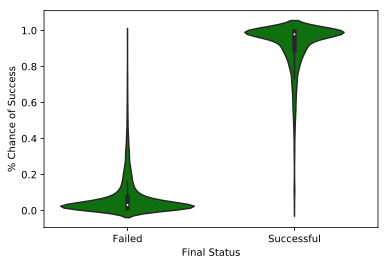

In [205]:
ax = sns.violinplot(x=df_games_X_4['is_successful'], y=df_games_X_4['predictions'], color='green')

ax.set(xlabel='Final Status', ylabel='% Chance of Success')
ax.set(xticklabels=['Failed', 'Successful'])
plt.show()

In [166]:
with open('/Users/robertpagano/metis_data/project_4/final_rf_predictions.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_4, to_write)

In [169]:
df_games_X_4.to_csv('/Users/robertpagano/metis_data/project_4/predictions.csv')

In [196]:
rf_random4.best_estimator_.predict_proba(new_X)

array([[0.32617571, 0.67382429]])

In [194]:
new_X = [[0.8237521419490355, 0, 5, 30, 1066.66, 120, 44, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [148]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random5 = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random5.fit(X5_train, y5_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [149]:
rf_random5.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [150]:
f1_best_rf_5 = f1_score(rf_random5.predict(X5_test), y5_test)
accuracy_best_rf_5 = accuracy_score(rf_random5.predict(X5_test), y5_test)
precision_best_rf_5 = precision_score(rf_random5.predict(X5_test), y5_test)
recall_best_rf_5 = recall_score(rf_random5.predict(X5_test), y5_test)
AUC_best_rf_5 = roc_auc_score(rf_random5.predict(X5_test), y5_test)

print(f'F1 test score is {f1_best_rf_5}')
print(f'Accuracy test score is {accuracy_best_rf_5}')
print(f'precision test score is {precision_best_rf_5}')
print(f'recall test score is {recall_best_rf_5}')
print(f'AUC test score is {AUC_best_rf_5}')

F1 test score is 0.5714285714285714
Accuracy test score is 0.6621507197290432
precision test score is 0.48717948717948717
recall test score is 0.6909090909090909
AUC test score is 0.6695751484696209


In [151]:
feature_list5 = list(X_5.columns)

In [152]:
importances5 = list(rf_random5.best_estimator_.feature_importances_)

In [153]:
feature_importances_5 = list(zip(feature_list5, importances5))

In [154]:
feature_importances_5_sorted = feature_importances_5.sort(key = lambda t: t[1], reverse=True)

saving all models:

In [95]:
X_1_model_logreg = best_logreg_model1.best_estimator_

In [96]:
X_2_model_rf = rf_random2.best_estimator_

In [97]:
X_3_model_logreg = best_logreg_model3.best_estimator_

In [132]:
X_4_model_rf = rf_random4.best_estimator_

In [98]:
X_5_model_logreg = best_logreg_model5.best_estimator_

In [155]:
X_5_model_rf = rf_random5.best_estimator_

In [99]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_1_model_logreg.pickle', 'wb') as to_write:
    pickle.dump(X_1_model_logreg, to_write)

In [100]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_2_model_rf.pickle', 'wb') as to_write:
    pickle.dump(X_2_model_rf, to_write)

In [101]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_3_model_logreg.pickle', 'wb') as to_write:
    pickle.dump(X_3_model_logreg, to_write)

In [133]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_4_model_rf.pickle', 'wb') as to_write:
    pickle.dump(X_4_model_rf, to_write)

In [102]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_5_model_logreg.pickle', 'wb') as to_write:
    pickle.dump(X_5_model_logreg, to_write)

In [156]:
with open('/Users/robertpagano/metis_data/project_4/model_data/model_pickles/X_5_model_rf.pickle', 'wb') as to_write:
    pickle.dump(X_5_model_rf, to_write)

It seems my best classifier is X_4_model_rf, my random forest without text features
And my best classifier on just text data is X_5_model_logreg. I'll now cross-validate on 